# 1. IMPORT MODUL

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gdown

from collections import Counter
from wordcloud import WordCloud
import re
import spacy

# 2. LOAD DATA

In [ ]:
# ID file
file_id = '132-y2nuuEftnJipE1_XK16axbV-oj0Hu'
# Output nama file lokal
output = 'IMDB_cleaned.csv'

# Download file
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=132-y2nuuEftnJipE1_XK16axbV-oj0Hu
To: /content/IMDB_cleaned.csv
100%|██████████| 64.2M/64.2M [00:00<00:00, 94.2MB/s]


'IMDB_cleaned.csv'

In [ ]:
df = pd.read_csv('IMDB_cleaned.csv')
df.head()

,cleaned_review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,petter matteis love in the time of money is a ...,positive


# 3. EDA

In [ ]:
df['word_count'] = df['cleaned_review'].apply(lambda x: len(x.split()))
df['text_length'] = df['cleaned_review'].apply(len)
df['hashtag_count'] = df['cleaned_review'].apply(lambda x: len(re.findall(r'#', x)))
df['mention_count'] = df['cleaned_review'].apply(lambda x: len(re.findall(r'@', x)))
df['link_count'] = df['cleaned_review'].apply(lambda x: len(re.findall(r'http', x)))

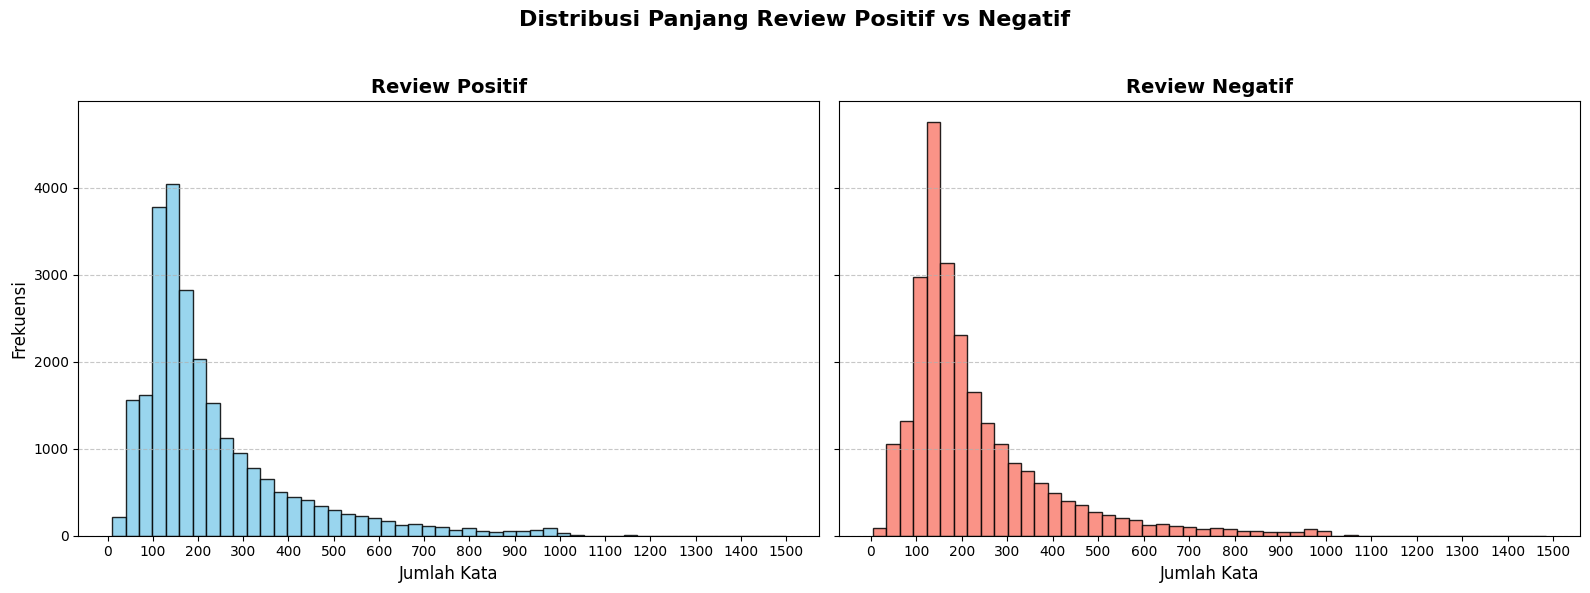

In [ ]:
# Hitung panjang review
df['review_length'] = df['cleaned_review'].apply(lambda x: len(x.split()))
positive_reviews = df[(df['sentiment'] == 'positive') & (df['review_length'] < 1500)]
negative_reviews = df[(df['sentiment'] == 'negative')& (df['review_length'] < 1500)]

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot review positif
axes[0].hist(positive_reviews['review_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.85)
axes[0].set_title('Review Positif', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Jumlah Kata', fontsize=12)
axes[0].set_ylabel('Frekuensi', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_xticks(range(0, 1501, 100))  # Optional: tiap 100 kata

# Plot review negatif
axes[1].hist(negative_reviews['review_length'], bins=50, color='salmon', edgecolor='black', alpha=0.85)
axes[1].set_title('Review Negatif', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Jumlah Kata', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_xticks(range(0, 1501, 100))  # Optional: tiap 100 kata

plt.suptitle('Distribusi Panjang Review Positif vs Negatif', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Supaya title tidak nabrak
plt.show()


Distribusi panjang review positif dan negatif menunjukkan pola yang sangat mirip. Keduanya didominasi oleh review dengan jumlah kata pendek (sekitar 100–150 kata) dan menunjukkan penurunan frekuensi yang tajam seiring bertambahnya panjang review. Meskipun terdapat sedikit perbedaan pada ketinggian puncak dan rentang sebaran, perbedaan tersebut tidak signifikan secara visual maupun statistik. Hal ini menunjukkan bahwa baik review positif maupun negatif cenderung ditulis dalam bentuk ringkas, dan tidak ada kecenderungan yang mencolok bahwa salah satu lebih panjang dari yang lain

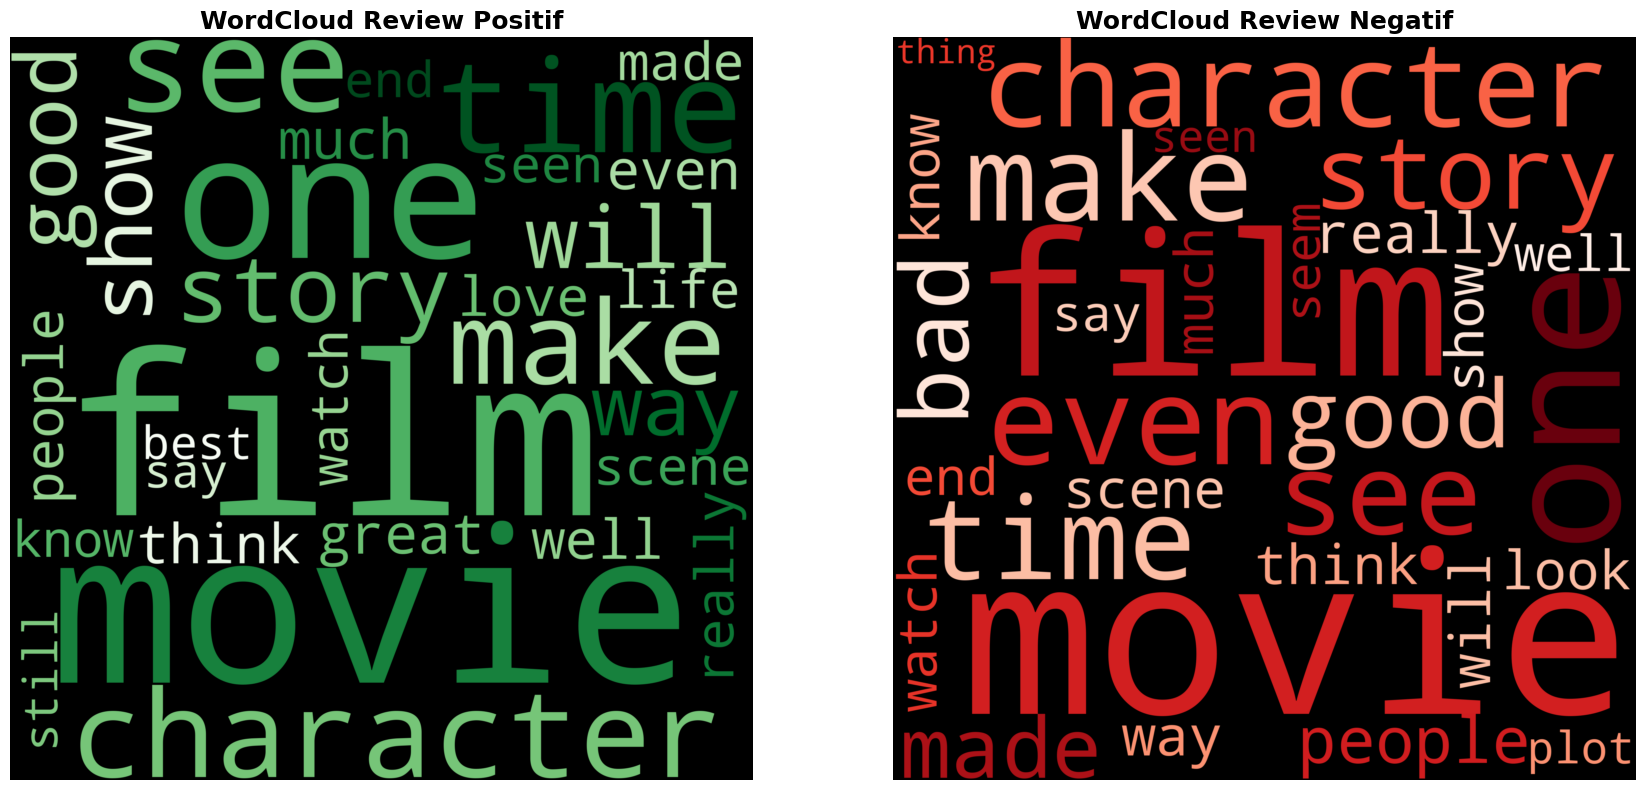

In [ ]:
# Buat DataFrame baru untuk label 0 dan 1
df_0 = df[df['sentiment'] == 'positive']
df_1 = df[df['sentiment'] == 'negative']

# Data gabungan teks
all_text_s1 = ' '.join(word for word in df_0['cleaned_review'].astype(str))
all_text_s2 = ' '.join(word for word in df_1['cleaned_review'].astype(str))

# Bersihkan apostrof
clean_positif = re.sub(r"'", "", all_text_s1)
clean_negatif = re.sub(r"'", "", all_text_s2)

# Buat WordCloud untuk positif
wordcloud_pos = WordCloud(
    colormap='Greens',
    width=1000,
    height=1000,
    background_color='black',
    max_font_size=300,
    relative_scaling=0.5,
    scale=3,
    max_words=30
).generate(clean_positif)

# Buat WordCloud untuk negatif
wordcloud_neg = WordCloud(
    colormap='Reds',
    width=1000,
    height=1000,
    background_color='black',
    max_font_size=300,
    relative_scaling=0.5,
    scale=3,
    max_words=30
).generate(clean_negatif)

# Tampilkan berdampingan
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 baris, 2 kolom

axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('WordCloud Review Positif', fontsize=18, fontweight='bold')

axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('WordCloud Review Negatif', fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
nlp = spacy.load("en_core_web_sm")

# Deteksi lokasi
def ner_detect_location(teks):
    doc = nlp(teks)
    lokasi = [ent.text for ent in doc.ents if ent.label_ in ['GPE', 'LOC']]
    return lokasi

# Deteksi person
def ner_detect_person(teks):
    doc = nlp(teks)
    person = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
    return person

# Deteksi tanggal/waktu
def ner_detect_date(teks):
    doc = nlp(teks)
    tanggal = [ent.text for ent in doc.ents if ent.label_ == 'DATE']
    return tanggal

# Deteksi organisasi
def ner_detect_organization(teks):
    doc = nlp(teks)
    organisasi = [ent.text for ent in doc.ents if ent.label_ == 'ORG']
    return organisasi


In [ ]:
df['ner_location'] = df['cleaned_review'].apply(ner_detect_location)
df['ner_person'] = df['cleaned_review'].apply(ner_detect_person)
df['ner_date'] = df['cleaned_review'].apply(ner_detect_date)
df['ner_organization'] = df['cleaned_review'].apply(ner_detect_organization)

/tmp/ipython-input-9-2710543123.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  loc_plot = sns.barplot(x=ner_loc_counts.values, y=ner_loc_counts.index, ax=axes[0, 0], palette="Blues_r")
/tmp/ipython-input-9-2710543123.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  person_plot = sns.barplot(x=ner_person_counts.values, y=ner_person_counts.index, ax=axes[0, 1], palette="Oranges_r")
/tmp/ipython-input-9-2710543123.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  date_plot = sns.barplot(x=ner_date_counts.values, y=ner_date_counts.index, ax=axes[1, 0], palette="Greens

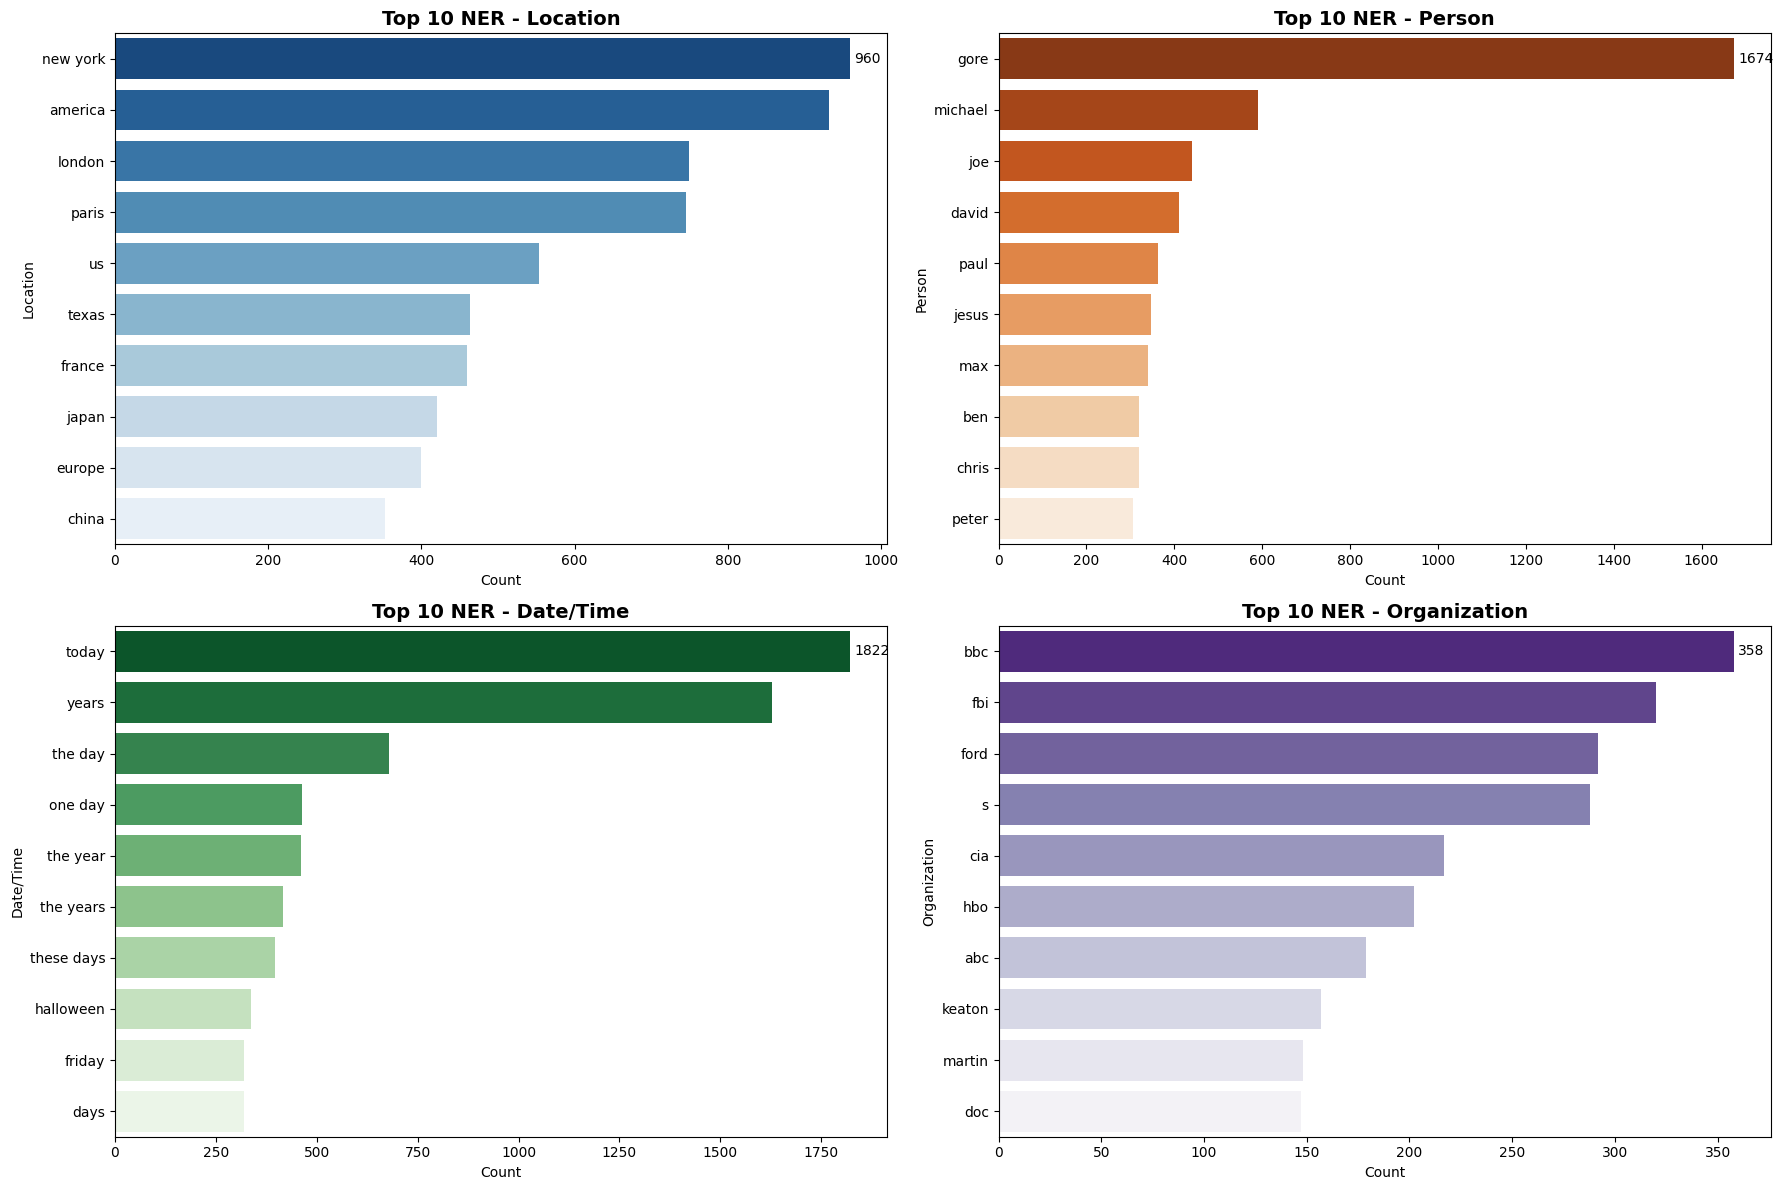

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung frekuensi 10 entitas teratas
ner_loc_counts = df['ner_location'].explode().value_counts().head(10)
ner_person_counts = df['ner_person'].explode().value_counts().head(10)
ner_date_counts = df['ner_date'].explode().value_counts().head(10)
ner_org_counts = df['ner_organization'].explode().value_counts().head(10)

# Buat plot 2x2
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- Plot 1: Location ---
loc_plot = sns.barplot(x=ner_loc_counts.values, y=ner_loc_counts.index, ax=axes[0, 0], palette="Blues_r")
axes[0, 0].set_title("Top 10 NER - Location", fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel("Count")
axes[0, 0].set_ylabel("Location")
axes[0, 0].bar_label(loc_plot.containers[0], fmt='%d', padding=3)

# --- Plot 2: Person ---
person_plot = sns.barplot(x=ner_person_counts.values, y=ner_person_counts.index, ax=axes[0, 1], palette="Oranges_r")
axes[0, 1].set_title("Top 10 NER - Person", fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel("Count")
axes[0, 1].set_ylabel("Person")
axes[0, 1].bar_label(person_plot.containers[0], fmt='%d', padding=3)

# --- Plot 3: Date ---
date_plot = sns.barplot(x=ner_date_counts.values, y=ner_date_counts.index, ax=axes[1, 0], palette="Greens_r")
axes[1, 0].set_title("Top 10 NER - Date/Time", fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel("Count")
axes[1, 0].set_ylabel("Date/Time")
axes[1, 0].bar_label(date_plot.containers[0], fmt='%d', padding=3)

# --- Plot 4: Organization ---
org_plot = sns.barplot(x=ner_org_counts.values, y=ner_org_counts.index, ax=axes[1, 1], palette="Purples_r")
axes[1, 1].set_title("Top 10 NER - Organization", fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel("Count")
axes[1, 1].set_ylabel("Organization")
axes[1, 1].bar_label(org_plot.containers[0], fmt='%d', padding=3)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, ngram_range=(1,1), n=None):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

top_2gram = get_top_ngrams(df['cleaned_review'], ngram_range=(2,2), n=10)
print("Top 2-gram:\n", top_2gram)

Top 2-gram:
 [('of the', np.int64(77192)), ('it is', np.int64(54063)), ('in the', np.int64(50370)), ('this movie', np.int64(31275)), ('and the', np.int64(26640)), ('the film', np.int64(25023)), ('to the', np.int64(23716)), ('to be', np.int64(23462)), ('the movie', np.int64(23224)), ('this film', np.int64(21552))]
